Learning Objectives
By the end of this lab, you will:

Load and preprocess the MNIST dataset for training an autoencoder.

Construct a simple autoencoder model using the Keras functional API.

Train the autoencoder on the MNIST dataset.

Evaluate the performance of the trained autoencoder.

Fine-tune the autoencoder to improve its performance.

Use the autoencoder to denoise images.

Step 1: Data Preprocessing
This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector.

In [1]:
import numpy as np
from keras.api.datasets import mnist
from keras.api.models import Model
from keras.api.layers import Input, Dense
import matplotlib.pyplot as plt

# Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()
'''
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
    path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).

Returns:
    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**`x_train`**: `uint8` NumPy array of grayscale image data with shapes
    `(60000, 28, 28)`, containing the training data. Pixel values range
    from 0 to 255.

**`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
    with shape `(60000,)` for the training data.

**`x_test`**: `uint8` NumPy array of grayscale image data with shapes
    `(10000, 28, 28)`, containing the test data. Pixel values range
    from 0 to 255.

**`y_test`**: `uint8` NumPy array of digit labels (integers in range 0-9)
    with shape `(10000,)` for the test data.

Example:

```python
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
'''


# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
# OK, the source code's path is /numpy/core/fromnumeric.py
# so mnist.load_data() returns a tuple of numpy arrays
# x_train and x_test are numpy arrays
# so x_train can call the method reshape() from numpy
# and its source code is funny
# Note that
#         the 'C' and 'F' options take no account of the memory layout of
#         the underlying array, and only refer to the order of indexing.
#         'A' means to read / write the elements in Fortran-like index
#         order if `a` is Fortran *contiguous* in memory, C-like order
#         otherwise.
'''
# not deprecated --- copy if necessary, view otherwise
@array_function_dispatch(_reshape_dispatcher)
def reshape(a, newshape, order='C'):
    """
    Gives a new shape to an array without changing its data.

    Parameters
    ----------
    a : array_like
        Array to be reshaped.
    newshape : int or tuple of ints
        The new shape should be compatible with the original shape. If
        an integer, then the result will be a 1-D array of that length.
        One shape dimension can be -1. In this case, the value is
        inferred from the length of the array and remaining dimensions.
    order : {'C', 'F', 'A'}, optional
        Read the elements of `a` using this index order, and place the
        elements into the reshaped array using this index order.  'C'
        means to read / write the elements using C-like index order,
        with the last axis index changing fastest, back to the first
        axis index changing slowest. 'F' means to read / write the
        elements using Fortran-like index order, with the first index
        changing fastest, and the last index changing slowest. Note that
        the 'C' and 'F' options take no account of the memory layout of
        the underlying array, and only refer to the order of indexing.
        'A' means to read / write the elements in Fortran-like index
        order if `a` is Fortran *contiguous* in memory, C-like order
        otherwise.

    Returns
    -------
    reshaped_array : ndarray
        This will be a new view object if possible; otherwise, it will
        be a copy.  Note there is no guarantee of the *memory layout* (C- or
        Fortran- contiguous) of the returned array.

    See Also
    --------
    ndarray.reshape : Equivalent method.

    Notes
    -----
    It is not always possible to change the shape of an array without copying
    the data.
    
    The `order` keyword gives the index ordering both for *fetching* the values
    from `a`, and then *placing* the values into the output array.
    For example, let's say you have an array:

    >>> a = np.arange(6).reshape((3, 2))
    >>> a
    array([[0, 1],
           [2, 3],
           [4, 5]])

    You can think of reshaping as first raveling the array (using the given
    index order), then inserting the elements from the raveled array into the
    new array using the same kind of index ordering as was used for the
    raveling.

    >>> np.reshape(a, (2, 3)) # C-like index ordering
    array([[0, 1, 2],
           [3, 4, 5]])
    >>> np.reshape(np.ravel(a), (2, 3)) # equivalent to C ravel then C reshape
    array([[0, 1, 2],
           [3, 4, 5]])
    >>> np.reshape(a, (2, 3), order='F') # Fortran-like index ordering
    array([[0, 4, 3],
           [2, 1, 5]])
    >>> np.reshape(np.ravel(a, order='F'), (2, 3), order='F')
    array([[0, 4, 3],
           [2, 1, 5]])

    Examples
    --------
    >>> a = np.array([[1,2,3], [4,5,6]])
    >>> np.reshape(a, 6)
    array([1, 2, 3, 4, 5, 6])
    >>> np.reshape(a, 6, order='F')
    array([1, 4, 2, 5, 3, 6])

    >>> np.reshape(a, (3,-1))       # the unspecified value is inferred to be 2
    array([[1, 2],
           [3, 4],
           [5, 6]])
    """
    return _wrapfunc(a, 'reshape', newshape, order=order)
'''
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In the above code:

 - Use Keras to load the MNIST dataset.
 - Normalize the image pixel values to the range [0, 1].
 - Flatten the 28x28 images to a 784-dimensional vector to reshape the data.

#### Step 2: Building the Autoencoder Model 

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss. 

In [2]:
# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Summary of the model
autoencoder.summary()

2025-03-15 15:07:19.720984: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-03-15 15:07:19.721008: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-03-15 15:07:19.721014: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-03-15 15:07:19.721033: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-15 15:07:19.721045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In the above code: 

**1. Define the Encoder:**
- Create an input layer with 784 neurons. 
- Add a Dense layer with 64 neurons and ReLU activation. 

**2. Define the Bottleneck:**
- Add a Dense layer with 32 neurons and ReLU activation. 

**3. Define the Decoder:**
- Add a Dense layer with 64 neurons and ReLU activation. 
- Add an output layer with 784 neurons and sigmoid activation. 

**4. Compile the Model:**
- Use the Adam optimizer and binary crossentropy loss.  


#### Step 3: Training the Autoencoder 

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself. 


In [ ]:
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

In the above code: 
- Use the `fit` method to train the model on the training data. 
- Set the number of epochs to 25 and the batch size to 256.. 
- Use the test data for validation. 

#### Step 4: Evaluating the Autoencoder 

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data. 


In [ ]:
# Predict the test data
reconstructed = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()    

In the above code: 

**1. Reconstruct Images:**
- Use the autoencoder to predict the test data. 
- Compare the original test images with the reconstructed images. 

**2. Visualize the Results:**
- Plot a few examples of original and reconstructed images side by side.

#### Step 5: Fine-Tuning the Autoencoder 

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.

In [ ]:
# Upfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]:
    layer.trainable = True

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model again
autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

In the above code: 

**1. Unfreeze the Encoder Layers:**
- Unfreeze the last four layers of the encoder. 

**2. Compile and Train the Model:**
- Recompile the model. 
- Train the model again for 10 epochs with the same training and validation data.

#### Step 6: Denoising Images with Autoencoder 

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images. 


In [ ]:
# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the model with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In the above code: 

**1. Add noise to the data:**
- Add random noise to the training and test data. 
- Train the Autoencoder with noisy data: 
-Train the autoencoder using the noisy images as input and the original images as target. 

**2. Evaluate the denoising performance:**
- Use the autoencoder to denoise the test images. 
- Compare the noisy, denoised, and original images. 


### Exercise 1: Exploring Different Bottleneck Sizes 

#### Objective: 

To understand the impact of different bottleneck sizes on the performance of the autoencoder. 

#### Instructions: 

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 

In [ ]:
import numpy as np
from keras.api.datasets import mnist
from keras.api.models import Model
from keras.api.layers import Input, Dense
import matplotlib.pyplot as plt

# Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

autoencoder_layers = [16,32,64]

for autocoder_layer in autoencoder_layers:
    # Bottleneck
    bottleneck = Dense(autocoder_layer, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder
    autoencoder = Model(input_layer, output_layer)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    # Summary of the model
    autoencoder.summary()

    autoencoder.fit(
        x_train, x_train,
        epochs=50,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )

    # Predict the test data
    reconstructed = autoencoder.predict(x_test)

    # Visualize the results
    n = 10  # Number of digits to display
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

### Exercise 2 - Adding Regularization to the Autoencoder 
 
#### Objective: 

To explore the effect of regularization on the performance of the autoencoder. 

#### Instructions: 

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 

In [ ]:
from keras.api.regularizers import l2

# Encoder with L2 regularization
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded)
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck)
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded)
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# autoencoder.summary()
# So I think I don't need to summary every time I create a model
# OK I got this
'''
Prints a string summary of the network.
Args:
    line_length: Total length of printed lines
        (e.g. set this to adapt the display to different
        terminal window sizes).
    positions: Relative or absolute positions of log elements
        in each line. If not provided, becomes
        `[0.3, 0.6, 0.70, 1.]`. Defaults to `None`.
    print_fn: Print function to use. By default, prints to `stdout`.
        If `stdout` doesn't work in your environment, change to `print`.
        It will be called on each line of the summary.
        You can set it to a custom function
        in order to capture the string summary.
    expand_nested: Whether to expand the nested models.
        Defaults to `False`.
    show_trainable: Whether to show if a layer is trainable.
        Defaults to `False`.
    layer_range: a list or tuple of 2 strings,
        which is the starting layer name and ending layer name
        (both inclusive) indicating the range of layers to be printed
        in summary. It also accepts regex patterns instead of exact
        names. In this case, the start predicate will be
        the first element that matches `layer_range[0]`
        and the end predicate will be the last element
        that matches `layer_range[1]`.
        By default `None` considers all layers of the model.

Raises:
    ValueError: if `summary()` is called before the model is built.
'''
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
loss = autoencoder.evaluate(x_test, x_test)
print(f'Regularized model loss: {loss}')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.7541 - val_loss: 0.4393
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4214 - val_loss: 0.3941
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3913 - val_loss: 0.3792
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3767 - val_loss: 0.3668
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3645 - val_loss: 0.3548
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3528 - val_loss: 0.3451
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3434 - val_loss: 0.3366
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3351 - val_loss: 0.3293
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3275 - val_loss: 0.3229
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3212 - val_loss: 0.3171
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3158 - val_loss: 0.3117
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

### Exercise 3 - Visualizing Intermediate Representations 

#### Objective: 

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder. 

#### Instructions: 

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features. 

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space. 
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space. 


172/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step

2025-03-15 15:07:23.918018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


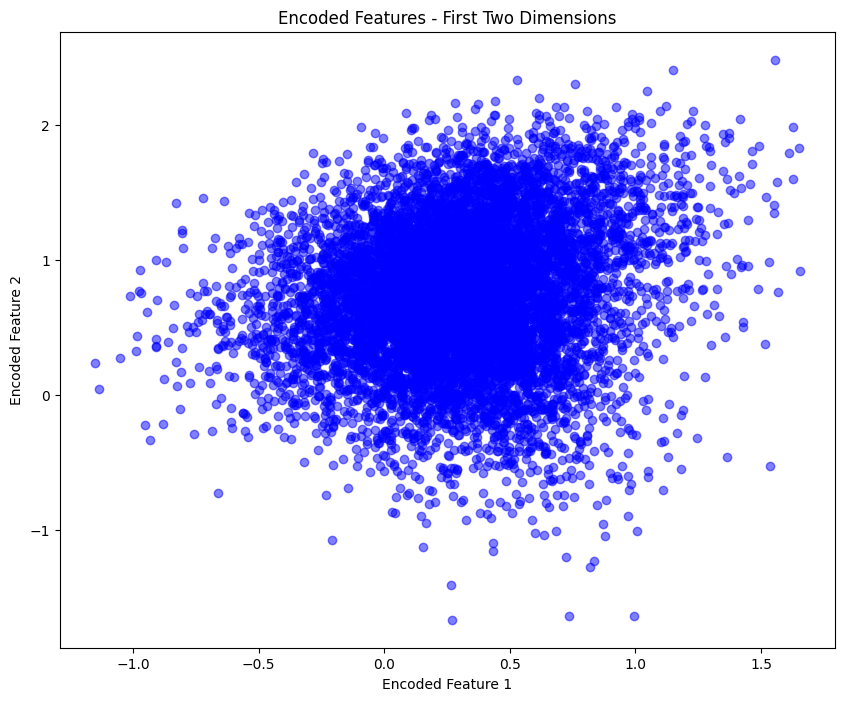

In [3]:
encoder_model = Model(input_layer, bottleneck)
encoded_imgs = encoder_model.predict(x_test)

plt.figure(figsize=(10, 8))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
plt.title('Encoded Features - First Two Dimensions')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()